## Clustering con Python

**Importar el dataset**

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("../datasets/wine/winequality-red.csv", sep=";")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
df.shape

(1599, 12)

In [4]:
import matplotlib.pyplot as plt

(array([ 10.,   0.,  53.,   0., 681.,   0., 638.,   0., 199.,  18.]),
 array([3. , 3.5, 4. , 4.5, 5. , 5.5, 6. , 6.5, 7. , 7.5, 8. ]),
 <a list of 10 Patch objects>)

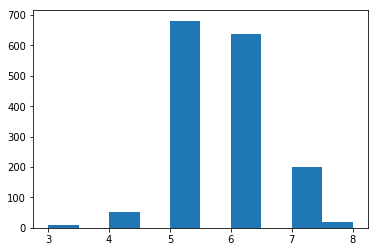

In [5]:
plt.hist(df["quality"])

In [6]:
df.groupby(df["quality"]).mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,8.360000,0.884500,0.171000,2.635000,0.122500,11.000000,24.900000,0.997464,3.398000,0.570000,9.955000
4,7.779245,0.693962,0.174151,2.694340,0.090679,12.264151,36.245283,0.996542,3.381509,0.596415,10.265094
5,8.167254,0.577041,0.243686,2.528855,0.092736,16.983847,56.513950,0.997104,3.304949,0.620969,9.899706
6,8.347179,0.497484,0.273824,2.477194,0.084956,15.711599,40.869906,0.996615,3.318072,0.675329,10.629519
7,8.872362,0.403920,0.375176,2.720603,0.076588,14.045226,35.020101,0.996104,3.290754,0.741256,11.465913
8,8.566667,0.423333,0.391111,2.577778,0.068444,13.277778,33.444444,0.995212,3.267222,0.767778,12.094444


### Normalizacion de los datos

In [7]:
df_norm = (df-df.min())/(df.max()-df.min())
df_norm.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385,0.4
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385,0.4
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385,0.6
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4


## Clusterin jerarquico con scikit.learn

In [8]:
from sklearn.cluster import AgglomerativeClustering

In [9]:
clus = AgglomerativeClustering(n_clusters = 6 , linkage="ward").fit(df_norm)

In [10]:
md_h = pd.Series(clus.labels_)


Text(0,0.5,'Número de vinos del cluster')

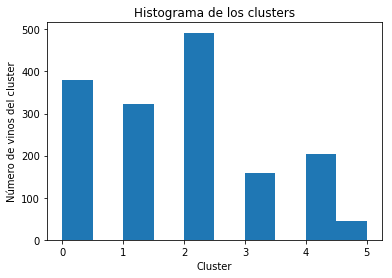

In [11]:
plt.hist(md_h)
plt.title("Histograma de los clusters")
plt.xlabel("Cluster")
plt.ylabel("Número de vinos del cluster")

In [12]:
clus.children_

array([[   0,    4],
       [ 135,  140],
       [ 750,  751],
       ...,
       [3179, 3191],
       [3192, 3193],
       [3194, 3195]], dtype=int64)

In [13]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [14]:
Z = linkage(df_norm,"ward")

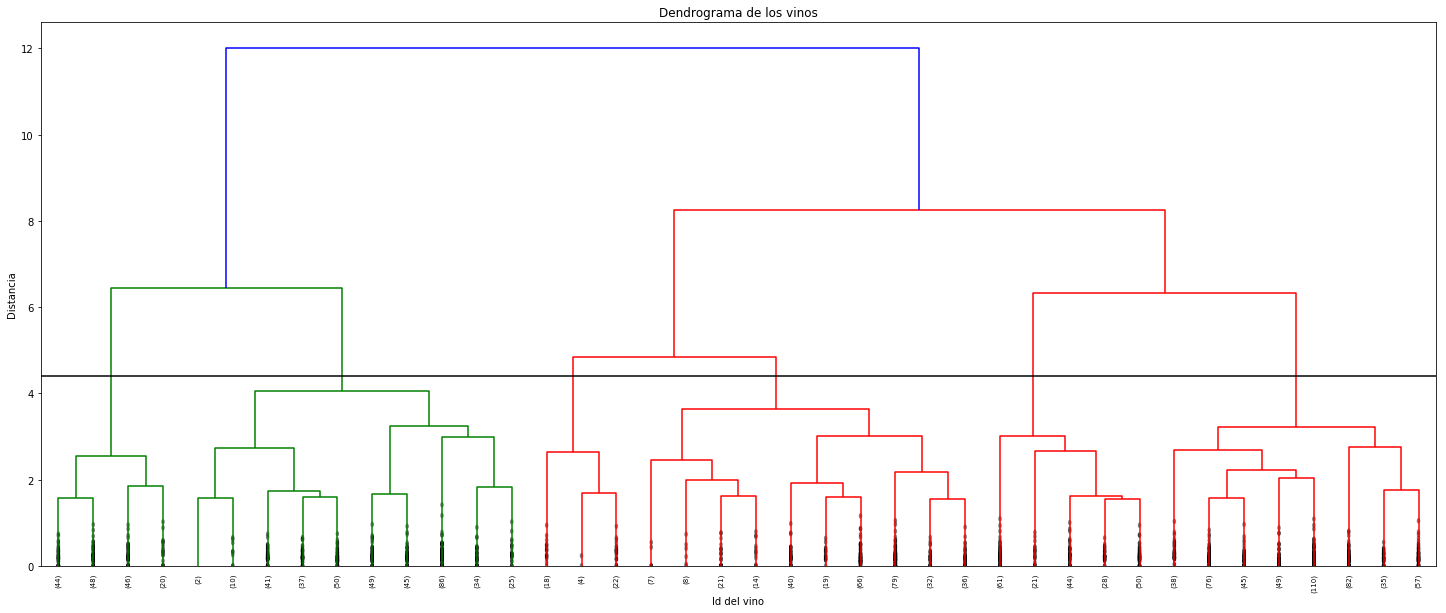

In [15]:
plt.figure(figsize=(25,10))
plt.title("Dendrograma de los vinos")
plt.xlabel("Id del vino")
plt.ylabel("Distancia")
dendrogram(Z, leaf_rotation = 90., leaf_font_size=7.,show_leaf_counts=True,show_contracted=True, truncate_mode="lastp", p=40)
plt.axhline(y=4.4,c='k')
plt.show()

## El corte para obtener 6 cluster viene dado por que el histograma da 6 columnas y por que el promedio (mean) tambien da 6

### K-means

In [43]:
from sklearn.cluster import KMeans
from sklearn import datasets

In [44]:
model = KMeans(n_clusters=6)
model.fit(df_norm)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [45]:
model.labels_

array([1, 1, 1, ..., 2, 2, 3])

In [19]:
md_k = pd.Series(model.labels_)

In [46]:
df_norm["clust_h"] = md_h
df_norm["clust_k"] = md_k
df_norm.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,clust_h,clust_k
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4,2,1
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385,0.4,2,1
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385,0.4,2,1
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385,0.6,3,4
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4,2,1


(array([233.,   0., 350.,   0., 309.,   0., 215.,   0., 227., 265.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <a list of 10 Patch objects>)

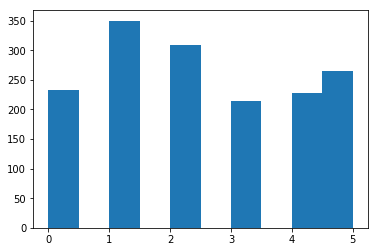

In [47]:
plt.hist(md_k)

In [48]:
model.cluster_centers_

array([[ 3.55495290e-01,  2.65885992e-01,  3.47354839e-01,
         1.70304905e-01,  1.29393074e-01,  3.58246252e-01,
         2.73407044e-01,  5.58559519e-01,  4.21539243e-01,
         1.86382075e-01,  2.38544251e-01,  4.65806452e-01,
         7.90322581e-01,  4.82903226e+00],
       [ 2.69030259e-01,  3.58713133e-01,  1.17924528e-01,
         9.13098418e-02,  1.23028248e-01,  1.48389288e-01,
         1.07296042e-01,  4.89842598e-01,  4.83996104e-01,
         1.54270076e-01,  2.27538569e-01,  4.43605870e-01,
         1.99161426e+00,  1.29140461e+00],
       [ 1.95204348e-01,  3.33740692e-01,  1.34481328e-01,
         8.59006423e-02,  1.54538338e-01,  2.34176845e-01,
         1.25668959e-01,  3.56861706e-01,  5.40856667e-01,
         2.30327726e-01,  4.33503564e-01,  5.58506224e-01,
         4.16182573e+00,  2.75103734e+00],
       [ 3.68770895e-01,  1.52648402e-01,  4.33511111e-01,
         1.06027397e-01,  1.05115934e-01,  1.66134585e-01,
         8.28111504e-02,  4.03488334e-01,  4.

In [49]:
model.inertia_

770.0655193283958

## Interpretacion final

In [52]:
df_norm.groupby("clust_k").mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,clust_h
clust_k,,,,,,,,,,,,,
0,0.370580,0.154374,0.433648,0.106796,0.105104,0.166052,0.084002,0.404911,0.412389,0.239855,0.504655,0.715021,0.081545
1,0.237168,0.389022,0.067286,0.093806,0.120758,0.167505,0.106986,0.479501,0.523240,0.151737,0.235355,0.420571,2.137143
2,0.323453,0.273396,0.264531,0.087223,0.130801,0.140480,0.125173,0.515547,0.424203,0.186811,0.216256,0.496440,1.537217
3,0.172546,0.316629,0.097116,0.093469,0.094545,0.253554,0.127422,0.317269,0.577916,0.185462,0.499129,0.614884,3.423256
4,0.588827,0.208542,0.545198,0.130982,0.174564,0.145374,0.097772,0.655084,0.316487,0.253238,0.293505,0.545374,2.480176
5,0.325597,0.281610,0.310642,0.169760,0.129543,0.402870,0.314581,0.548896,0.425167,0.189131,0.214843,0.452075,1.037736


In [ ]:
* Si quieres vender la opinion del catador vende los del cluster 0 y 3
* Si quieres vinos para una zona donde les gusta el alcohol usa los del cluster 0 y 3

In [51]:
df_norm.groupby("clust_h").mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,clust_k
clust_h,,,,,,,,,,,,,
0,0.380858,0.171341,0.422691,0.109661,0.109928,0.178844,0.098362,0.450974,0.417198,0.226202,0.439821,0.653298,1.277045
1,0.311109,0.282598,0.299255,0.159683,0.126075,0.349926,0.283037,0.545567,0.441899,0.174080,0.203376,0.450932,4.173913
2,0.265613,0.356714,0.113557,0.091213,0.124109,0.147873,0.105073,0.486659,0.485132,0.156005,0.228685,0.455285,1.428862
3,0.644449,0.206477,0.548734,0.128576,0.124564,0.142271,0.098135,0.684780,0.301455,0.226218,0.296754,0.559494,3.905063
4,0.169313,0.344531,0.080000,0.089394,0.095731,0.253521,0.122151,0.329572,0.589432,0.182165,0.482944,0.578431,2.735294
5,0.335881,0.279577,0.405455,0.069894,0.430073,0.172535,0.184388,0.508911,0.274875,0.517148,0.171678,0.450000,3.181818
